# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')

#Find the header elements in the table 
header = table.find_all('th')

#create an empty list for the column names ( header elements)
columns = []

#Loop through all the elements of the header
for i in range(len(header)):
    #add the elements to the header string, with a comma
    columns.append(header[i].text)

#Print all the header elements, including the last one
print(f"Columns: {columns}")    


Columns: ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
#find all the rows (class data-row to ignore header)
data_rows = table.find_all('tr', class_= 'data-row')

# Create an empty list
data_dicts = []

# Loop through the scraped data to create a list of rows
for row in data_rows:
    #find all row elements 
    data = row.find_all('td')

#create an empty dictionary for the elements
data_row = {}

#loop through all the columns
for i in range(len(columns)):
    #add the row element to dictionary, indexed by column name
    data_row[columns[i]] = data[i].text

data_dicts.append(data_row)    


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(data_dicts)
weather_df

#with all the data saved in the DataFrame, the browser cab be closed
browser.quit()

In [8]:
# Confirm DataFrame was created successfully
# Print the list to confirm success
display(data_dicts)

[{'id': '1895',
  'terrestrial_date': '2018-02-27',
  'sol': '1977',
  'ls': '135',
  'month': '5',
  'min_temp': '-77.0',
  'pressure': '727.0'}]

### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
#Numerical types
clean_weather_df = weather_df.astype({'sol': 'int',
                                      'ls': 'int',
                                      'month': 'int',
                                      'min_temp': 'float',
                                      'pressure': 'float'})

#Datetime types
clean_weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'], format='%Y-%m-%d')

In [11]:
# Confirm type changes were successful by examining data types again
clean_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_of_months = clean_weather_df['month'].nunique()
print(f"There are {num_of_months} months on Mars.")

#Display the number of occurences of each month (sorted by month number)
clean_weather_df['month'].value_counts().sort_index()

There are 1 months on Mars.


month
5    1
Name: count, dtype: int64

In [13]:
# 2. How many sols (Martian days) worth of data are there?
num_of_sols = clean_weather_df['sol'].nunique()
print(f"There are {num_of_sols} Martian days (sols) worth of data (distinct values)")

num_of_sols = clean_weather_df['sol'].count()
print(f"There are {num_of_sols} Martian days (sols) worth of data")

There are 1 Martian days (sols) worth of data (distinct values)
There are 1 Martian days (sols) worth of data


In [14]:
# 3. What is the average minimum temperature by month?
avg_temp_per_month = clean_weather_df.groupby(['month']).mean('min_temp')['min_temp']
display(avg_temp_per_month)

month
5   -77.0
Name: min_temp, dtype: float64

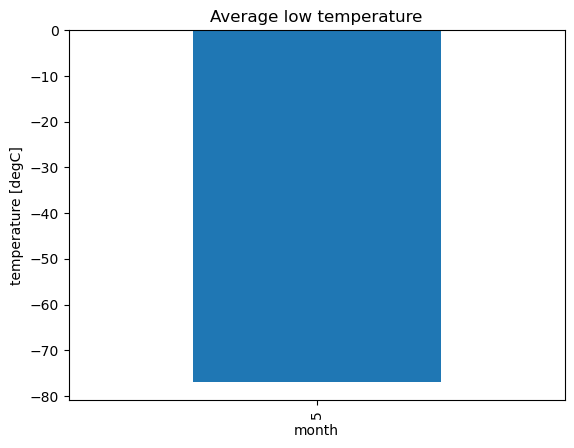

In [15]:
# Plot the average minimum temperature by month
avg_temp_per_month.plot.bar('min_temp', title = 'Average low temperature', ylabel = 'temperature [degC]')

#save image 
#plt.savefig('Output/avg_temp_per_month_sorted')

#show plot
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph


In [17]:
# 4. What is the average pressure by month?
avg_press_per_month = clean_weather_df.groupby(['month']).mean('pressure')['pressure']
display(avg_press_per_month)

month
5    727.0
Name: pressure, dtype: float64

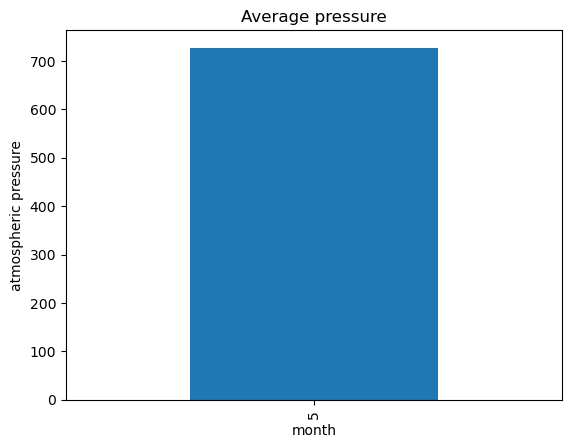

In [18]:
# Plot the average pressure by month
avg_press_per_month.plot.bar('min_temp', title = 'Average pressure', ylabel = 'atmospheric pressure')

#show plot
plt.show()

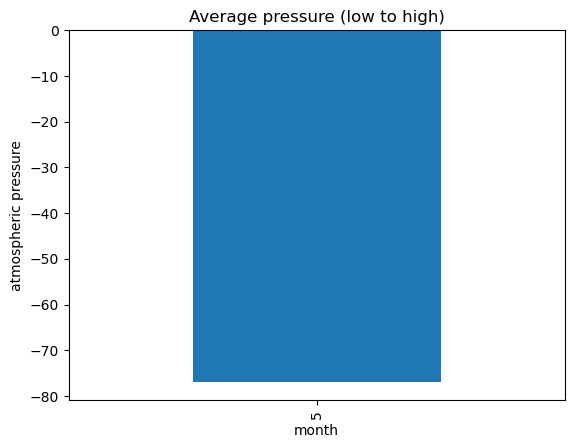

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_temp_per_month_sorted = avg_temp_per_month.sort_values()

#plot the average pressure by month (sorted from low to high)
avg_temp_per_month_sorted.plot.bar('min_temp', title = 'Average pressure (low to high)', ylabel = 'atmospheric pressure')

#save image as PNG
#plt.savefig('Output/avg_press_per_month_sorted.png')

#show plot
plt.show()

Start day: 2018-02-27 00:00:00
Start day: 2018-02-27 00:00:00
Mission duration: 0 terrestrial days
Number of days between peaks: ~0
Error compared to real value (687 days): -100.00%


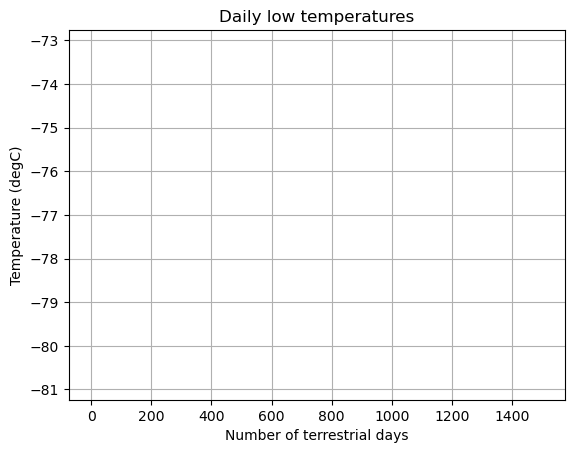

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
daily_temperature = clean_weather_df[['terrestrial_date', 'sol', 'min_temp']]

#get the first and last dates of the missions (based on the available data)
first_day = daily_temperature['terrestrial_date'].min()
last_day = daily_temperature['terrestrial_date'].max()

#print the first and last mission days 
print(f'Start day: {first_day}')
print(f'Start day: {last_day}')

#calculate # of terrestrial days over mission
delta = last_day - first_day
num_of_days = delta.days

#print the mission duration
print(f"Mission duration: {num_of_days} terrestrial days")

#ignore 
pd.set_option('mode.chained_assignment', None)

#create new column
daily_temperature['Number of terrestrial days'] = 0

#iterate through DataFrame
for index, row in daily_temperature.iterrows():
    #calculate the # days since beginning of mission and date in current row
    delta = daily_temperature.loc[index, 'terrestrial_date'] - first_day

    #save # of elapsed days in new column
    daily_temperature.loc[index, 'Number of terrestrial days'] = delta.days

#plot the temp vs # of days since start
daily_temperature.plot('Number of terrestrial days', 'min_temp', grid = True, title = 'Daily low temperatures', ylabel = 'Temperature (degC)', legend = False)

#Estimate peak to peak distance
peak_1_day = 820
peak_2_day =1500

#calculate the min and max temp 
min_temp = daily_temperature['min_temp'].min()
max_temp = daily_temperature['min_temp'].max()

#plot vertical lines to highlight peaks
plt.vlines(peak_1_day,min_temp, max_temp, 'r')
plt.vlines(peak_2_day,min_temp, max_temp, 'r')

#calculate # of days between peaks
peak_to_peak = peak_2_day - peak_2_day
print(f"Number of days between peaks: ~{peak_to_peak}")

#compare to real value
mars_year = 687
print(f"Error compared to real value ({mars_year} days): {100*(peak_to_peak-mars_year)/mars_year:.2f}%")

#save image as PNG
#plt.savefig("Output/daily_temperature.png")

#show plot
plt.show()


#### Minimum Temperature

YOUR ANALYSIS HERE

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

YOUR ANALYSIS HERE

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV


In [22]:
browser.quit()